In [1]:
import time
from IPython.display import clear_output, display

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline

In [2]:
# Utils

# Fonction pour générer la droite représentant notre modèle
def getHypothesisForPLot(theta):
    return pd.DataFrame({'x':np.arange(0, 12000, 100)/1000,
                         'y':[hypothesis(x,theta)/1000 for x in np.arange(0, 12000, 100)]})

# on plot les données avec l'hypothèse correpondant à la valeur de theta 
#    ainsi que l'évolution dans la courbe de J(theta) en fonction de theta
# On rajoute également la valeur de J(theta) en fonction du temps qui va nous servir à 
#   débuger notre algorithme

def plotData(ax,x,y,theta,yhat,gradDescentEvol):
    ax.plot(x,y,'o',label='data')
    ax.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y,'r',label='hypothèse')
    for i in range(x.shape[0]):
        ax.plot((x[i],x[i]), (min(y[i],yhat[i]),max(y[i],yhat[i])), 'k-')
    ax.legend(fontsize=12)

def plotCostFunction(ax,x,y,theta,gradDescentEvol,thetaInit):
#    thetaRange = np.arange(abs(thetaInit)-100,abs(thetaInit)+100,0.1)
    thetaRange = np.arange(80-100,80+100,0.1)
    costFctEvol = pd.DataFrame({'theta':thetaRange,
                                'cost':[costFunction(y,hypothesis(x,genTheta))
                                        for genTheta in thetaRange]})

    ax.plot(costFctEvol.theta,costFctEvol.cost,label='J(theta)')
    for i in range(gradDescentEvol.shape[0]):
        ax.plot(gradDescentEvol.theta[i],gradDescentEvol.J[i],'ro')
    for i in range(gradDescentEvol.shape[0]-1):
        ax.plot((gradDescentEvol.theta[i],gradDescentEvol.theta[i+1]),
                (gradDescentEvol.J[i],gradDescentEvol.J[i+1]),'k-',lw=1)
    ax.legend(fontsize=12)

def plotCostFunctionEvol(ax,gradDescentEvol):
    ax.plot(np.arange(gradDescentEvol.shape[0]),gradDescentEvol.J,label='J(theta)')
    ax.legend(fontsize=12)
    
def plotCostFunctionEvolwTest(ax,gradDescentEvol):
    ax.plot(np.arange(gradDescentEvol.shape[0]),gradDescentEvol.Jtrain,label='J(train)')
    ax.plot(np.arange(gradDescentEvol.shape[0]),gradDescentEvol.Jtest,label='J(test)')
    ax.legend(fontsize=15)

# 1) Get data

In [3]:
# Get data
data = pd.read_csv('data/graphicCards.csv')
data = data[['memory (Go)','price (euros)']].dropna()
data.columns = ['x1','y']
data.x1 = data.x1
print(data.shape)
data.head()

(246, 2)


,x1,y
0,1.0,37.94
1,1.0,39.95
2,1.0,39.95
3,1.0,39.95
4,1.0,41.95


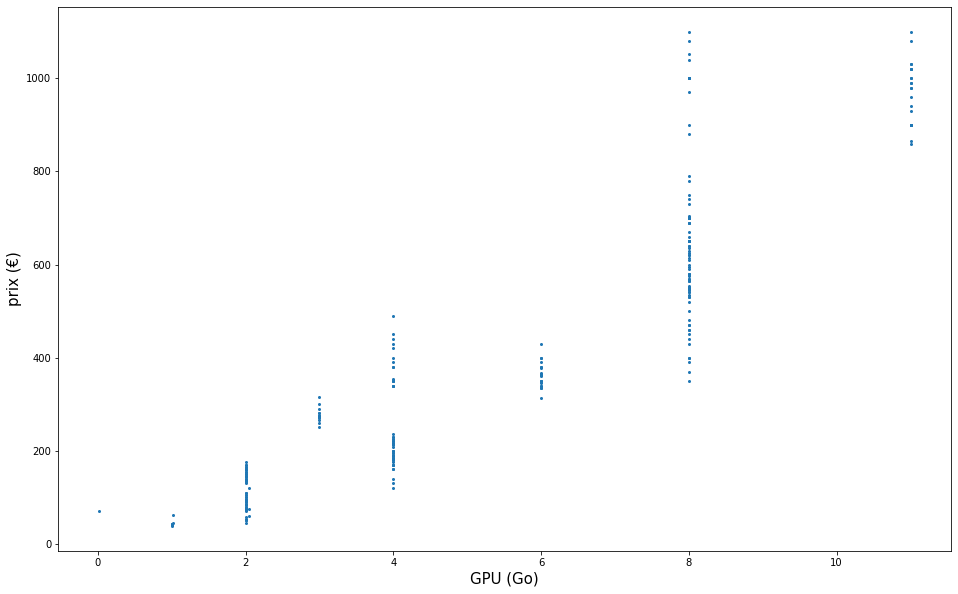

In [4]:
#Plot data
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(data.x1,data.y,'o', ms=2)
plt.xlabel('GPU (Go)',fontsize=15)
plt.ylabel('prix (€)',fontsize=15)
plt.show();

# 2) Contruire un modéle pour nos données


* ### Soit: $x_{1}$ la valeur de GPU de nos $m$ carte graphiques, et $y$ leur prix

* ### On cherche à déterminer le modèle pour prédire un prix $\hat{y}$ à partir $x_{1}$: 

## $\hat{y} = h_{\theta}(x_{1})$


* ### On défini le paramètre $\theta_{1}$ qui va lier $x_{1}$ à $\hat{y}$: 

## $ h_{\theta}(x) = \theta_{1} x_{1}$


* ### Rappel math: fonction linéaire $f(x) = kx$

In [5]:
# Définir notre hypothèse (fonction)

def hypothesis(x,theta):
    return np.dot(x,theta)

In [6]:
# On génère aléatoirement une valeur de départ pour le paramètre theta1 de notre modèle

theta = np.random.rand()
print(theta)

0.9678856856273681


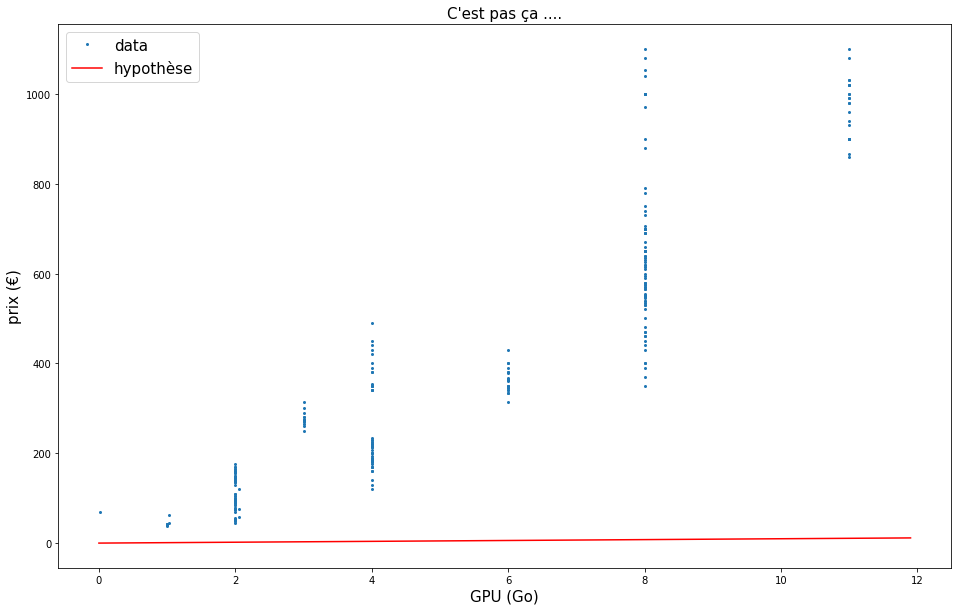

theta = 0.967886


In [7]:
# On plot les données avec notre hypothèse ...

fig, ax = plt.subplots(figsize=(16,10))
plt.plot(data.x1, data.y,'o',label='data',ms=2)
plt.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y ,'r',label='hypothèse')
plt.xlabel('GPU (Go)',fontsize=15)
plt.ylabel('prix (€)',fontsize=15)
plt.title("C'est pas ça ....",fontsize=15)
plt.legend(fontsize=15)
plt.show();

print("theta = %f" % theta)

# 3) Tester la pertinence de notre modèle: la fonction de coût

* ### $J(\theta)$: Véracité de notre modèle

* ### Somme Quadratique des erreurs: 

## $J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=0}^{m}(\hat{y}^{(i)} - y^{(i)})^{2}$

In [8]:
# On définit notre fonction de coût: somme quadratique (eg: on somme les carré)

def costFunction(y,yhat):
    return np.square(yhat - y).sum()/(2*y.shape[0])

In [9]:
# Prix prédis par notre modèle (avec un theta choisi pour illustrer) pour chaque exemple

theta = 80
costFctData = data.iloc[np.random.randint(0,data.shape[0],10)]
costFctData.index = np.arange(10)
yhat = hypothesis(costFctData.x1,theta)

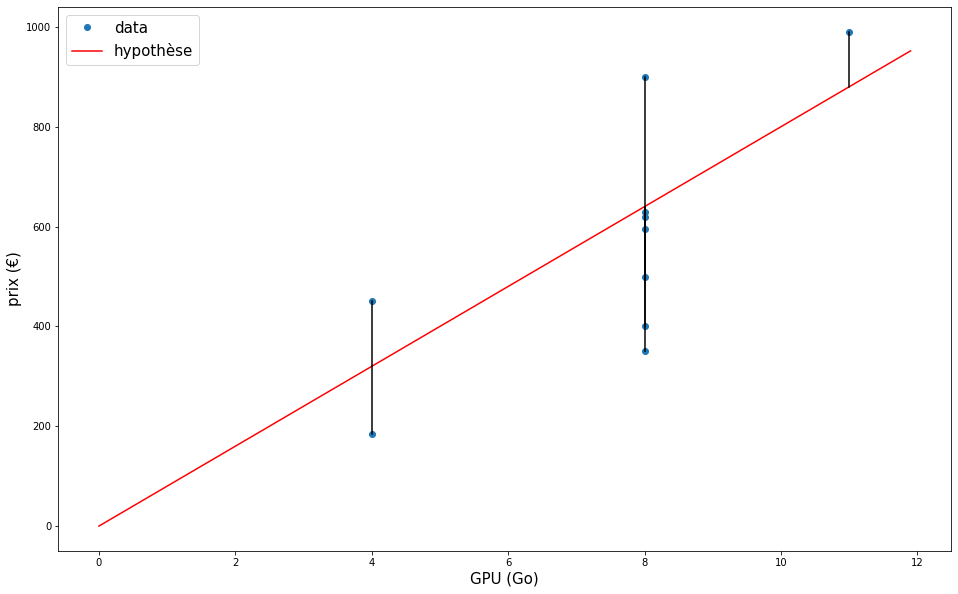

theta = 80.000000
J(theta) = 13933.816070


In [10]:
#Comment fonctionne la fonction de coût: on somme le carré de toute les barre noire

fit, ax = plt.subplots(figsize=(16,10))
plt.plot(costFctData.x1,costFctData.y,'o',label='data')
plt.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y,'r',label='hypothèse')
for i in range(costFctData.shape[0]):
    plt.plot((costFctData.x1[i],costFctData.x1[i]), (min(costFctData.y[i],yhat[i]),max(costFctData.y[i],yhat[i])), 'k-')
plt.xlabel('GPU (Go)',fontsize=15)
plt.ylabel('prix (€)',fontsize=15)
plt.legend(fontsize=15)
plt.show();

print("theta = %f" % theta)
print("J(theta) = %f" % costFunction(costFctData.y,yhat))

# 4) À quoi ressemble J(theta) en fonction de theta1

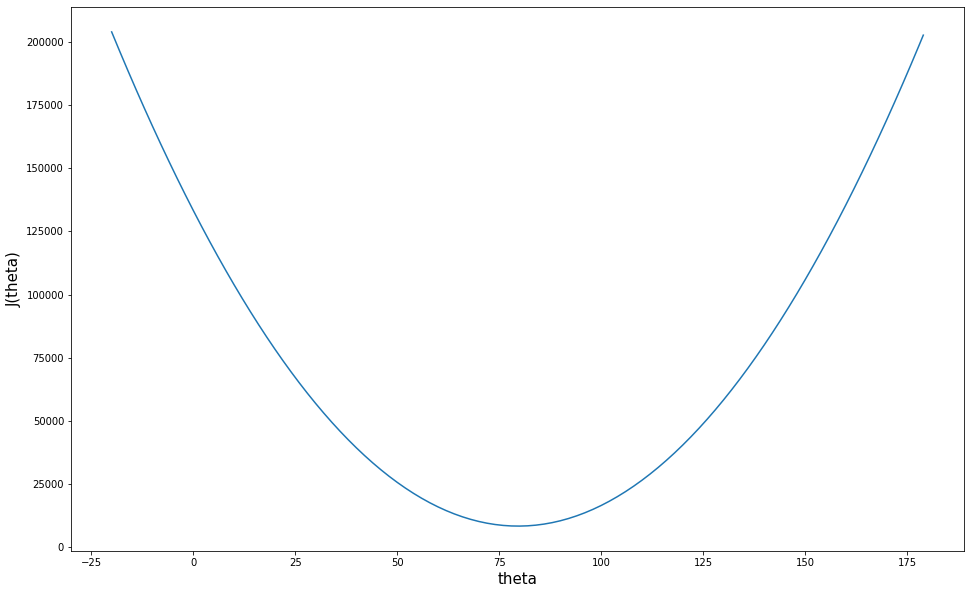

In [11]:
# Calculons (brutalement) la valeur de J(theta) dans un intervale de valeur de theta1 
#     pour observer la forme de notre fonction de coût que nous allons chercher à minimiser

thetaRange = np.arange(80-100,80+100,1)
costFctEvol = pd.DataFrame({'theta':thetaRange,
                            'cost':[costFunction(data.y,hypothesis(data.x1,theta)) 
                                    for theta in thetaRange]})

fit, ax = plt.subplots(figsize=(16,10))
plt.plot(costFctEvol.theta,costFctEvol.cost)
plt.xlabel('theta',fontSize=15)
plt.ylabel('J(theta)',fontSize=15)
plt.show();

# 5) La descente de Gradient

* ## On utilise la dérivée de la fonction de coût: $\frac{d}{d\theta_{1}}J(\theta)$

    * ### Si $J(\theta)$ est croissant: $\frac{d}{d\theta_{1}}J(\theta) > 0$
    * ### Si $J(\theta)$ est décroissant: $\frac{d}{d\theta_{1}}J(\theta) < 0$

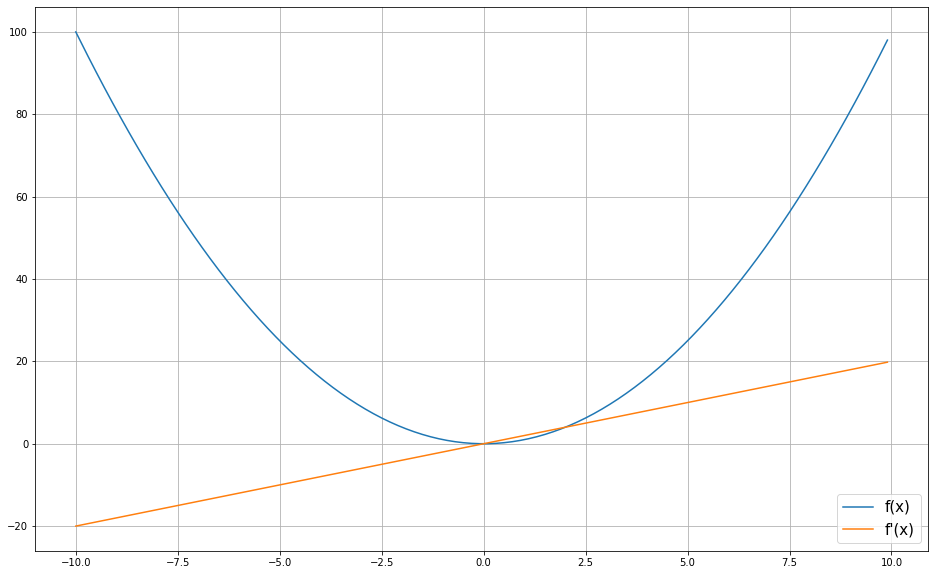

In [12]:
# La descente de gradient utilise la notion de dérivée, 
#      illustrée ici avec la fonction carré (qui doit nous en rappeler une autre!)

def fct(x):
    return np.power(x,2)

def fctDeriv(x):
    return 2*x

fctCarre = pd.DataFrame({'x':np.arange(-10,10,0.1),'y':[fct(x) for x in np.arange(-10,10,0.1)]})
fctCarreD = pd.DataFrame({'x':np.arange(-10,10,0.1),
                          'y':[fctDeriv(x) for x in np.arange(-10,10,0.1)]})
fit, ax = plt.subplots(figsize=(16,10))
plt.plot(fctCarre.x,fctCarre.y,label='f(x)')
plt.plot(fctCarreD.x,fctCarreD.y,label="f'(x)")
plt.grid(True)
plt.legend(fontsize=15);

## Dérivée de la somme quadratique des erreurs:


* ### $J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=0}^{m}(\hat{y}^{(i)} - y^{(i)})^{2} = \frac{1}{2m} \displaystyle\sum_{i=0}^{m}(\theta_{1}x_{1}^{(i)} - y^{(i)})^{2}$
* ### $\frac{d}{d\theta_{1}}J(\theta) = \frac{1}{m}\displaystyle\sum_{i=0}^{m}(\hat{y}^{(i)} - y^{(i)}) x_{1}^{(i)}$

In [13]:
# La descente de gradient utilise la dérivée de la fonction de coût 
#    par rapport au paramètre theta1

def costFctDeriv(x,y,yhat):
    return ((yhat - y)*x.T).sum(axis=1)/y.shape[0]

## Algorithme de la descente de gradient:

### $\begin{matrix} \text{Répéter jusqu'à convergence:} & \{ & \\ & & \theta_{1} := \theta_{1} - \alpha \frac{d}{d\theta_{1}}J(\theta) \\ & \} & \end{matrix}$

In [14]:
# À chaque étape de la descente de gradient (jusqu'à la convergence), 
#   on incremente la valeur de theta1 par ce résultat.
#   Alpha est le learning rate

def gradDescent(x,y,yhat,alpha):
    return -alpha*costFctDeriv(x,y,yhat)

## Préparation du dataset:

* ### On sépare aléatoirement les données en 2 (3) échantillons:
    * Entraînement / (Validation) / Test
    * 80 / 20 (70 / 30) ou 60 / 20 / 20

* ### Entraînement: utilisé pour la descente de gradient
* ### Validation: utilisé pour l'hyperparamètrage de l'algo
* ### Test: utilisé pour mesurer la performance du modèle

In [15]:
# Split train/test
index = data.index.values.copy()
random.shuffle(index)

X_train = data.x1.loc[index[:int(len(index)*0.7)]]
X_test = data.x1.loc[index[int(len(index)*0.7):]]
Y_train = data.y.loc[index[:int(len(index)*0.7)]]
Y_test = data.y.loc[index[int(len(index)*0.7):]]

X_train.index = np.arange(X_train.shape[0])
Y_train.index = np.arange(Y_train.shape[0])
X_test.index = np.arange(X_test.shape[0])
Y_test.index = np.arange(Y_test.shape[0])

print("Train set X shape: {}".format(X_train.shape))
print("Train set Y shape: {}".format(Y_train.shape))
print("Test set X shape: {}".format(X_test.shape))
print("Test set X shape: {}".format(Y_test.shape))

Train set X shape: (172,)
Train set Y shape: (172,)
Test set X shape: (74,)
Test set X shape: (74,)


## Hand-tunning (hyperparamètrage)

* ### Learning rate: $\alpha$ = 0.045 (pour la démo), plus efficace avec $\alpha$ = 0.03
* ### Précision (stop l'apprentissage): $\epsilon$ = 0.01

In [16]:
# On utilise donc une valeur de départ pour theta généré aléatoirement entre 0 et 1, 
#    la valeur du learning rate est fixé à 0.00000003
# Epsilon correspond à la précision que l'on veut atteindre pour stopper la descente de gradient

thetaInit = np.random.rand()
yhat = hypothesis(X_train,thetaInit)
alpha = 0.045
epsilon = 0.01

In [17]:
# On prepare un dataframe pour stocker les valeurs de J(theta) et theta1

gradDescentEvol = pd.DataFrame({'theta':thetaInit,
                                'J':costFunction(Y_train,yhat)},index = np.arange(1))

In [18]:
# Convert X_train into dataframe
X_train = pd.DataFrame({"x1": X_train})

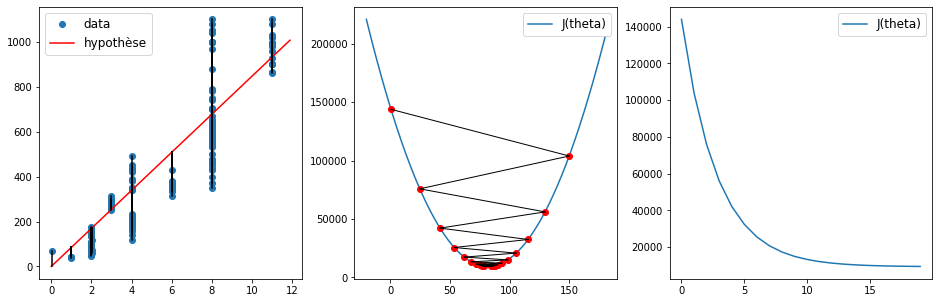

In [19]:
plt.rcParams['figure.figsize'] = [16, 5]
costFct = 0
count = 0
theta = thetaInit

# Et on se lance dans la boucle: La descente de gradient!
while np.abs(costFunction(Y_train,yhat) - costFct) >= epsilon*costFct:
    count += 1
    costFct = costFunction(Y_train,yhat)
    theta += gradDescent(X_train,Y_train,yhat,alpha)
    yhat = hypothesis(X_train,theta)
    gradDescentEvol = gradDescentEvol.append(pd.DataFrame({'theta':theta['x1'],
                                                           'J':costFunction(Y_train,yhat)},
                                                          index = np.arange(1)),
                                             ignore_index=True)
    fig, ax = plt.subplots(ncols=3)
    plotData(ax[0],X_train['x1'],Y_train,theta['x1'],yhat,gradDescentEvol)
    plotCostFunction(ax[1],X_train['x1'],Y_train,theta['x1'],gradDescentEvol,thetaInit)
    plotCostFunctionEvol(ax[2],gradDescentEvol)
    clear_output(wait=True)
    display(plt.gcf())
    plt.close(fig)

In [20]:
theta

x1    84.633211
dtype: float64

# 6) Prédictions

In [21]:
def errorFct(y,yhat):
    return np.abs(yhat - y).sum()/(y.shape[0])

In [22]:
# Afficher les résultats:
print('La descente de gradient a été réalisé en %i étapes.' % count)
print('theta = %f' % theta)
print("\nTrain set:")
print('J(theta) = %f' % costFunction(Y_train,hypothesis(X_train['x1'],theta['x1'])))
print('Error = %f' % errorFct(Y_train, hypothesis(X_train,theta)))
print("\nTest set:")
print('J(theta) = %f' % costFunction(Y_test,hypothesis(X_test,theta['x1'])))
print('Error = %f' % errorFct(Y_test, hypothesis(X_test,theta['x1'])))

La descente de gradient a été réalisé en 19 étapes.
theta = 84.633211

Train set:
J(theta) = 9530.363883
Error = 106.532867

Test set:
J(theta) = 6526.943473
Error = 92.190763


Notre nouvelle carte de 5 Go de GPU pourra se vendre autour de 423.17 €
Notre nouvelle carte de 10 Go de GPU pourra se vendre autour de 846.33 €
Notre nouvelle carte de 14 Go de GPU pourra se vendre autour de 1184.86 €


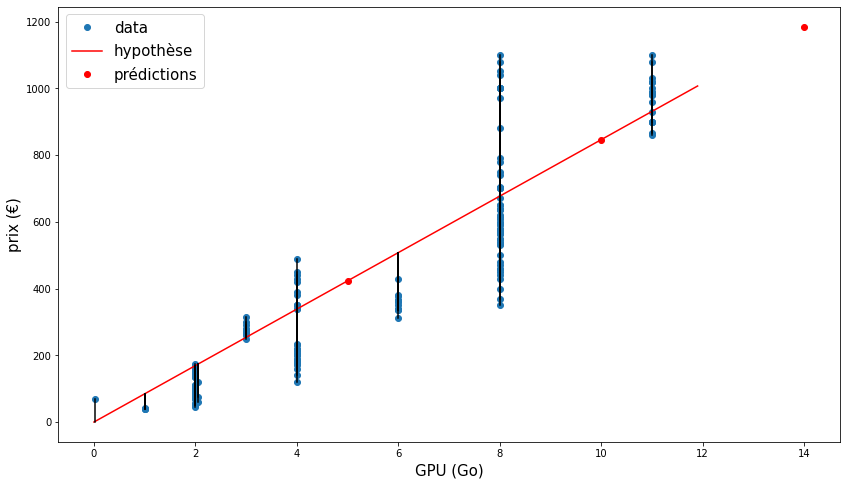

In [23]:
# Faisons une prédiction ....

newGPUs = [5,10,14]
for newGPU in newGPUs:
    print("Notre nouvelle carte de %i Go de GPU pourra se vendre autour de %.2f €" % 
          (newGPU,newGPU*theta))
    
plt.rcParams['figure.figsize'] = [14, 8]
plt.plot(X_train,Y_train,'o',label='data')
plt.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y,'r',label='hypothèse')
for i in range(X_train.shape[0]):
    plt.plot((X_train['x1'][i],X_train['x1'][i]), (min(Y_train[i],yhat[i]),max(Y_train[i],yhat[i])), 'k-')
plt.plot(newGPUs,[newGPU*theta for newGPU in newGPUs], 'or', label='prédictions')
plt.xlabel('GPU (Go)',fontsize=15)
plt.ylabel('prix (€)',fontsize=15)
plt.legend(fontsize=15)
plt.show();

# 7) Régression linéaire multivariable

In [25]:
# Get data (again...)
data = pd.read_csv('data/graphicCards.csv')
data.head()

,builder,chipset,frequency (MHz),boostFreq (MHz),overclok,bus,memory (Go),interfaceMem (bits),video memory freq (MHz),memory type,stream procs,direct X (max),multi GPU,consumption (W),price (euros)
0,amd,amd,625.0,NaN,no,PCI Express 2.0 16x,1.0,64,667.0,DDR3,160.0,11.0,NaN,18.0,37.94
1,asus,amd,625.0,NaN,no,PCI Express 2.0 16x,1.0,64,600.0,GDDR3,160.0,11.0,CrossFireX,19.0,39.95
2,msi,nvidia,954.0,NaN,no,PCI Express 2.0 16x,1.0,64,800.0,DDR3,192.0,12.0,NaN,19.0,39.95
3,sapphire,amd,625.0,NaN,no,PCI Express 2.0 16x,1.0,64,667.0,DDR3,160.0,11.0,NaN,18.0,39.95
4,asus,nvidia,954.0,NaN,no,PCI Express 2.0 16x,1.0,64,800.0,GDDR5,192.0,12.0,NaN,19.0,41.95


## Data exploration: Deal with missing data

In [27]:
data.columns

Index(['builder', 'chipset', 'frequency (MHz)', 'boostFreq (MHz)', 'overclok',
       'bus', 'memory (Go)', 'interfaceMem (bits)', 'video memory freq (MHz)',
       'memory type', 'stream procs', 'direct X (max)', 'multi GPU',
       'consumption (W)', 'price (euros)'],
      dtype='object')

In [28]:
data.shape

(246, 15)

In [29]:
data.isnull().sum()

builder                      0
chipset                      1
frequency (MHz)              4
boostFreq (MHz)             54
overclok                     0
bus                          0
memory (Go)                  0
interfaceMem (bits)          0
video memory freq (MHz)      1
memory type                  0
stream procs                 3
direct X (max)               1
multi GPU                  100
consumption (W)              2
price (euros)                0
dtype: int64

In [30]:
# Missing variables (NaN)
print("There are empty columns? {}".format(data.isnull().all().any()))
print("There are columns with mising values? {}".format(data.isnull().any().any()))
print("\nWhich ones?:\n")
print(data[data.columns[data.isnull().any()].values].isnull().sum())

There are empty columns? False
There are columns with mising values? True

Which ones?:

chipset                      1
frequency (MHz)              4
boostFreq (MHz)             54
video memory freq (MHz)      1
stream procs                 3
direct X (max)               1
multi GPU                  100
consumption (W)              2
dtype: int64


In [31]:
# Take look at the chipset feature
print("Unique values: {}\n".format(data.chipset.unique()))
print("Count values: \n")
print(data.chipset.value_counts())

Unique values: ['amd' 'nvidia' nan]

Count values: 

nvidia    171
amd        74
Name: chipset, dtype: int64


In [32]:
# What is the nan chipset entry?
data[data.chipset.isnull()]

,builder,chipset,frequency (MHz),boostFreq (MHz),overclok,bus,memory (Go),interfaceMem (bits),video memory freq (MHz),memory type,stream procs,direct X (max),multi GPU,consumption (W),price (euros)
17,startech,NaN,NaN,NaN,no,PCI,0.016,32,NaN,DDR,NaN,NaN,NaN,2.0,69.95


In [33]:
# What can we do? We drop it here (not interesting for our purpose). Don't forget to update indexing
print("Data shape before droping: {}".format(data.shape))
data = data[data.chipset.notnull()]
data.index = np.arange(data.shape[0])
print("Data shape after droping: {}".format(data.shape))
print("\nWhat are columns with missing values now?:\n")
print(data[data.columns[data.isnull().any()].values].isnull().sum())

Data shape before droping: (246, 15)
Data shape after droping: (245, 15)

What are columns with missing values now?:

frequency (MHz)     3
boostFreq (MHz)    53
stream procs        2
multi GPU          99
consumption (W)     2
dtype: int64


In [34]:
# BoostFreq features is NaN when the constructor don't provide information.
# One can seen that as the given graphic card has not boosting option
# Solution is to set this value to frequency value if NaN (then we'll deal with NaN frequency entries)
data.loc[data['boostFreq (MHz)'].isnull(),'boostFreq (MHz)'] = data.loc[data['boostFreq (MHz)'].isnull(),
                                                                        'frequency (MHz)']
print("\nWhat are columns with missing values now?:\n")
print(data[data.columns[data.isnull().any()].values].isnull().sum())


What are columns with missing values now?:

frequency (MHz)     3
boostFreq (MHz)     3
stream procs        2
multi GPU          99
consumption (W)     2
dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [35]:
# What about the multi GPU?
print("Unique values: {}\n".format(data['multi GPU'].unique()))
print("Count values: \n")
print(data['multi GPU'].value_counts())

Unique values: [nan 'CrossFireX' 'SLI']

Count values: 

SLI           75
CrossFireX    71
Name: multi GPU, dtype: int64


In [36]:
# SLI is the nvidia multi GPU technology while CrossFireX is the AMD one
# As distinction beetween AMD and Nvidia is given with chipset features, 
#    one could transform multi GPU feature to a boolean one:
#       - True if card has multi GPU technology (SLI or CrossFireX)
#       - False if not (NaN values)
data['multi GPU'] = data['multi GPU'].notnull()
print("multi GPU feature exemples: {}\n".format(data['multi GPU'].values[:10]))
print("What are columns with missing values now?:\n")
print(data[data.columns[data.isnull().any()].values].isnull().sum())

multi GPU feature exemples: [False  True False False False False False  True  True False]

What are columns with missing values now?:

frequency (MHz)    3
boostFreq (MHz)    3
stream procs       2
consumption (W)    2
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# So, what about the last NaN values?
# Technicaly, frequency and boostFreq NaN corresponds to the same entries
# Print all NaN entries
data[data.isnull().any(axis=1)]

,builder,chipset,frequency (MHz),boostFreq (MHz),overclok,bus,memory (Go),interfaceMem (bits),video memory freq (MHz),memory type,stream procs,direct X (max),multi GPU,consumption (W),price (euros)
18,asus,nvidia,902.0,902.0,no,PCI Express 2.0 16x,2.048,64,1252.0,GDDR5,384.0,11.0,False,NaN,74.95
19,msi,nvidia,902.0,902.0,no,PCI Express 2.0 16x,2.000,64,800.0,DDR3,NaN,12.0,False,25.0,74.95
39,gigabyte,amd,1200.0,1200.0,yes,PCI Express 3.0 16x,2.048,128,1625.0,GDDR5,768.0,12.0,True,NaN,119.95
42,asus,amd,NaN,NaN,yes,PCI Express 3.0 16x,2.000,128,1750.0,GDDR5,1024.0,12.0,True,80.0,134.95
69,asus,amd,NaN,NaN,yes,PCI Express 3.0 16x,4.000,128,1750.0,GDDR5,1024.0,12.0,True,80.0,179.95
71,asus,amd,NaN,NaN,yes,PCI Express 3.0 16x,4.000,128,1750.0,GDDR5,1024.0,12.0,True,90.0,184.96
114,msi,nvidia,1544.0,1759.0,yes,PCI Express 3.0 16x,6.000,192,8008.0,GDDR5,NaN,12.0,False,120.0,344.95


In [38]:
# There are several way to deal with that:
#       -> find information from other source (constructor site)
#       -> estimate missing values from data (could introduce biais!)
#       -> drop them (only if there represent a small part of data)
#
# Here we'll drop them for simplicity
print("We'll drop {} entries ({}%)".format(data[data.isnull().any(axis=1)].shape[0],
                                           (data[data.isnull().any(axis=1)].shape[0]/data.shape[0])*100))
print("\nData shape before droping: {}".format(data.shape))
data = data[data.notnull().all(axis=1)]
data.index = np.arange(data.shape[0])
print("Data shape after droping: {}\n".format(data.shape))
print("There are empty columns? {}".format(data.isnull().all().any()))
print("There are columns with mising values? {}".format(data.isnull().any().any()))

We'll drop 7 entries (2.857142857142857%)

Data shape before droping: (245, 15)
Data shape after droping: (238, 15)

There are empty columns? False
There are columns with mising values? False


## Data exploration: Features engineering

In [39]:
# Let print first rows of our data
data.head()

,builder,chipset,frequency (MHz),boostFreq (MHz),overclok,bus,memory (Go),interfaceMem (bits),video memory freq (MHz),memory type,stream procs,direct X (max),multi GPU,consumption (W),price (euros)
0,amd,amd,625.0,625.0,no,PCI Express 2.0 16x,1.0,64,667.0,DDR3,160.0,11.0,False,18.0,37.94
1,asus,amd,625.0,625.0,no,PCI Express 2.0 16x,1.0,64,600.0,GDDR3,160.0,11.0,True,19.0,39.95
2,msi,nvidia,954.0,954.0,no,PCI Express 2.0 16x,1.0,64,800.0,DDR3,192.0,12.0,False,19.0,39.95
3,sapphire,amd,625.0,625.0,no,PCI Express 2.0 16x,1.0,64,667.0,DDR3,160.0,11.0,False,18.0,39.95
4,asus,nvidia,954.0,954.0,no,PCI Express 2.0 16x,1.0,64,800.0,GDDR5,192.0,12.0,False,19.0,41.95


In [40]:
# How to transform our categorial features?
# Several things are possible, let's try to transform them as boolean features
#  -> First get number of uniques values for each categorials features
categorialFeatures = ['builder','chipset','overclok','bus','memory type','direct X (max)']
for feature in categorialFeatures:
    print("\n{}: ({} unique values)".format(feature, len(data[feature].unique())))
    print(data[feature].unique())


builder: (8 unique values)
['amd' 'asus' 'msi' 'sapphire' 'gigabyte' 'evga' 'zotac' 'inno3D']

chipset: (2 unique values)
['amd' 'nvidia']

overclok: (3 unique values)
['no' 'no ' 'yes']

bus: (3 unique values)
['PCI Express 2.0 16x' 'PCI Express 2.0 8x' 'PCI Express 3.0 16x']

memory type: (7 unique values)
['DDR3' 'GDDR3' 'GDDR5' 'DDR4' 'GDRR5' 'GDDR5X' 'HBM2']

direct X (max): (3 unique values)
[11.  12.  11.2]


In [41]:
# Here, we spot an error in overclok columns: 'no ' with a space. 
# It seems to be a typo, let replace it by correct 'no' value
data.loc[data.overclok == 'no ','overclok'] = 'no'
 
# Other problem: directX == 11.2 -> set it to 11
data.loc[data['direct X (max)'] == 11.2,'direct X (max)'] = 11

for feature in categorialFeatures:
    print("\n{}: ({} unique values)".format(feature, len(data[feature].unique())))
    print(data[feature].unique())


builder: (8 unique values)
['amd' 'asus' 'msi' 'sapphire' 'gigabyte' 'evga' 'zotac' 'inno3D']

chipset: (2 unique values)
['amd' 'nvidia']

overclok: (2 unique values)
['no' 'yes']

bus: (3 unique values)
['PCI Express 2.0 16x' 'PCI Express 2.0 8x' 'PCI Express 3.0 16x']

memory type: (7 unique values)
['DDR3' 'GDDR3' 'GDDR5' 'DDR4' 'GDRR5' 'GDDR5X' 'HBM2']

direct X (max): (2 unique values)
[11. 12.]


In [42]:
# Set direct X as string type
data['direct X (max)'] = data['direct X (max)'].astype(str)

In [43]:
# Features with only 2 possible values -> Set booleans
data['chipset_amd'] = (data['chipset'] == 'amd') * 1
data['overclock'] = (data['overclok'] == 'yes') * 1
data['direct_X_11'] = (data['direct X (max)'] == '11.0') * 1

data.drop(['chipset', 'overclok', 'direct X (max)'], axis=1, inplace=True)

categorialFeatures.remove('chipset')
categorialFeatures.remove('overclok')
categorialFeatures.remove('direct X (max)')

In [44]:
# Let's create our boolean features (using get_dummies)
data = pd.concat([data.drop(categorialFeatures, axis=1), pd.get_dummies(data[categorialFeatures])], axis=1)    
print("New data shape: {}".format(data.shape))

New data shape: (238, 30)


In [45]:
# Now replace boolean values (True, False) by numeric number (1, 0)
data[data.columns[data.dtypes == bool]] = data[data.columns[data.dtypes == bool]] * 1

data.head()

,frequency (MHz),boostFreq (MHz),memory (Go),interfaceMem (bits),video memory freq (MHz),stream procs,multi GPU,consumption (W),price (euros),chipset_amd,...,bus_PCI Express 2.0 16x,bus_PCI Express 2.0 8x,bus_PCI Express 3.0 16x,memory type_DDR3,memory type_DDR4,memory type_GDDR3,memory type_GDDR5,memory type_GDDR5X,memory type_GDRR5,memory type_HBM2
0,625.0,625.0,1.0,64,667.0,160.0,0,18.0,37.94,1,...,1,0,0,1,0,0,0,0,0,0
1,625.0,625.0,1.0,64,600.0,160.0,1,19.0,39.95,1,...,1,0,0,0,0,1,0,0,0,0
2,954.0,954.0,1.0,64,800.0,192.0,0,19.0,39.95,0,...,1,0,0,1,0,0,0,0,0,0
3,625.0,625.0,1.0,64,667.0,160.0,0,18.0,39.95,1,...,1,0,0,1,0,0,0,0,0,0
4,954.0,954.0,1.0,64,800.0,192.0,0,19.0,41.95,0,...,1,0,0,0,0,0,1,0,0,0


In [46]:
# Last feature engineering transformation: replace boostFreq feature by the diff beetween frequency and boostFreq
data['boostFreqIncr'] = data['boostFreq (MHz)'] - data['frequency (MHz)']
data.drop('boostFreq (MHz)',axis=1,inplace=True)

In [47]:
# Last things, make sure index are correct
data.index = np.arange(data.shape[0])
# That's ok now! Let print new data shape and first rows
print("Data shape = {}".format(data.shape))
data.head()

Data shape = (238, 30)


,frequency (MHz),memory (Go),interfaceMem (bits),video memory freq (MHz),stream procs,multi GPU,consumption (W),price (euros),chipset_amd,overclock,...,bus_PCI Express 2.0 8x,bus_PCI Express 3.0 16x,memory type_DDR3,memory type_DDR4,memory type_GDDR3,memory type_GDDR5,memory type_GDDR5X,memory type_GDRR5,memory type_HBM2,boostFreqIncr
0,625.0,1.0,64,667.0,160.0,0,18.0,37.94,1,0,...,0,0,1,0,0,0,0,0,0,0.0
1,625.0,1.0,64,600.0,160.0,1,19.0,39.95,1,0,...,0,0,0,0,1,0,0,0,0,0.0
2,954.0,1.0,64,800.0,192.0,0,19.0,39.95,0,0,...,0,0,1,0,0,0,0,0,0,0.0
3,625.0,1.0,64,667.0,160.0,0,18.0,39.95,1,0,...,0,0,1,0,0,0,0,0,0,0.0
4,954.0,1.0,64,800.0,192.0,0,19.0,41.95,0,0,...,0,0,0,0,0,1,0,0,0,0.0


## Normalize dataset

In [48]:
# Let store our Y vector (price) in separate Series
Y = data['price (euros)']
data.drop('price (euros)',axis=1,inplace=True)

In [49]:
# Before normalize inputs, let's print a description of non-boolean features
data.describe()

,frequency (MHz),memory (Go),interfaceMem (bits),video memory freq (MHz),stream procs,multi GPU,consumption (W),chipset_amd,overclock,direct_X_11,...,bus_PCI Express 2.0 8x,bus_PCI Express 3.0 16x,memory type_DDR3,memory type_DDR4,memory type_GDDR3,memory type_GDDR5,memory type_GDDR5X,memory type_GDRR5,memory type_HBM2,boostFreqIncr
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,...,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,1383.399160,5.609647,284.369748,3514.352941,1696.268908,0.596639,141.357143,0.294118,0.684874,0.050420,...,0.012605,0.920168,0.046218,0.008403,0.008403,0.722689,0.163866,0.004202,0.046218,123.344538
std,243.725732,3.002020,397.880967,3469.831447,1111.672930,0.491606,80.899027,0.456605,0.465545,0.219272,...,0.111797,0.271604,0.210400,0.091476,0.091476,0.448615,0.370934,0.064820,0.210400,93.185169
min,625.000000,1.000000,64.000000,600.000000,96.000000,0.000000,18.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,1276.500000,3.000000,128.000000,1750.000000,768.000000,0.000000,75.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,1411.000000,6.000000,192.000000,2000.000000,1280.000000,1.000000,120.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,114.000000
75%,1581.500000,8.000000,256.000000,2044.250000,2432.000000,1.000000,180.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,202.000000
max,1797.000000,11.000000,2048.000000,11400.000000,4096.000000,1.000000,350.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,379.000000


In [50]:
# As boostFreqIncr features has negatives values, in MinMax scaler is not a good thing to do.
# Instead we'll use a standard scaler (remove mean, divide by standard deviation)
data[data.columns[data.dtypes != object]] = (data[data.columns[data.dtypes != object]] - \
                                             data[data.columns[data.dtypes != object]].mean()) / \
                                            data[data.columns[data.dtypes != object]].std()
data.head()

,frequency (MHz),memory (Go),interfaceMem (bits),video memory freq (MHz),stream procs,multi GPU,consumption (W),chipset_amd,overclock,direct_X_11,...,bus_PCI Express 2.0 8x,bus_PCI Express 3.0 16x,memory type_DDR3,memory type_DDR4,memory type_GDDR3,memory type_GDDR5,memory type_GDDR5X,memory type_GDRR5,memory type_HBM2,boostFreqIncr
0,-3.111691,-1.535515,-0.553858,-0.820603,-1.381943,-1.213652,-1.524829,1.545935,-1.471123,4.330612,...,-0.112749,-3.387903,4.533173,-0.091864,-0.091864,-1.610935,-0.441765,-0.06482,-0.219669,-1.32365
1,-3.111691,-1.535515,-0.553858,-0.839912,-1.381943,0.820497,-1.512467,1.545935,-1.471123,4.330612,...,-0.112749,-3.387903,-0.219669,-0.091864,10.839936,-1.610935,-0.441765,-0.06482,-0.219669,-1.32365
2,-1.761813,-1.535515,-0.553858,-0.782272,-1.353158,-1.213652,-1.512467,-0.644140,-1.471123,-0.229944,...,-0.112749,-3.387903,4.533173,-0.091864,-0.091864,-1.610935,-0.441765,-0.06482,-0.219669,-1.32365
3,-3.111691,-1.535515,-0.553858,-0.820603,-1.381943,-1.213652,-1.524829,1.545935,-1.471123,4.330612,...,-0.112749,-3.387903,4.533173,-0.091864,-0.091864,-1.610935,-0.441765,-0.06482,-0.219669,-1.32365
4,-1.761813,-1.535515,-0.553858,-0.782272,-1.353158,-1.213652,-1.512467,-0.644140,-1.471123,-0.229944,...,-0.112749,-3.387903,-0.219669,-0.091864,-0.091864,0.618149,-0.441765,-0.06482,-0.219669,-1.32365


In [51]:
# Add bias: coef directeur -> Une GPU n'est jamais gratuite !
data['x0'] = 1
data.head()

,frequency (MHz),memory (Go),interfaceMem (bits),video memory freq (MHz),stream procs,multi GPU,consumption (W),chipset_amd,overclock,direct_X_11,...,bus_PCI Express 3.0 16x,memory type_DDR3,memory type_DDR4,memory type_GDDR3,memory type_GDDR5,memory type_GDDR5X,memory type_GDRR5,memory type_HBM2,boostFreqIncr,x0
0,-3.111691,-1.535515,-0.553858,-0.820603,-1.381943,-1.213652,-1.524829,1.545935,-1.471123,4.330612,...,-3.387903,4.533173,-0.091864,-0.091864,-1.610935,-0.441765,-0.06482,-0.219669,-1.32365,1
1,-3.111691,-1.535515,-0.553858,-0.839912,-1.381943,0.820497,-1.512467,1.545935,-1.471123,4.330612,...,-3.387903,-0.219669,-0.091864,10.839936,-1.610935,-0.441765,-0.06482,-0.219669,-1.32365,1
2,-1.761813,-1.535515,-0.553858,-0.782272,-1.353158,-1.213652,-1.512467,-0.644140,-1.471123,-0.229944,...,-3.387903,4.533173,-0.091864,-0.091864,-1.610935,-0.441765,-0.06482,-0.219669,-1.32365,1
3,-3.111691,-1.535515,-0.553858,-0.820603,-1.381943,-1.213652,-1.524829,1.545935,-1.471123,4.330612,...,-3.387903,4.533173,-0.091864,-0.091864,-1.610935,-0.441765,-0.06482,-0.219669,-1.32365,1
4,-1.761813,-1.535515,-0.553858,-0.782272,-1.353158,-1.213652,-1.512467,-0.644140,-1.471123,-0.229944,...,-3.387903,-0.219669,-0.091864,-0.091864,0.618149,-0.441765,-0.06482,-0.219669,-1.32365,1


## Train / test splitting

In [52]:
# We need to separate our dataset into two sub-sample:
#    -> train set: used to train the model (70%)
#    -> test set: to measure performances (30%)
# Let pick random entries
index = data.index.values.copy()
random.shuffle(index)

X_train = data.loc[index[:int(len(index)*0.7)]]
X_test = data.loc[index[int(len(index)*0.7):]]
Y_train = Y.loc[index[:int(len(index)*0.7)]]
Y_test = Y.loc[index[int(len(index)*0.7):]]

print("Train set X shape: {}".format(X_train.shape))
print("Train set Y shape: {}".format(Y_train.shape))
print("Test set X shape: {}".format(X_test.shape))
print("Test set X shape: {}".format(Y_test.shape))

Train set X shape: (166, 30)
Train set Y shape: (166,)
Test set X shape: (72, 30)
Test set X shape: (72,)


## Multivariable linear regression

In [53]:
# On génère aléatoirement le vecteur des paramétres de notre modèle
theta = np.random.rand(X_train.shape[1])-0.5

# Compute cost function value for this initialized model
yhat = hypothesis(X_train,theta)
print("Cost Function value = {}".format(costFunction(Y_train,yhat)))

Cost Function value = 138020.41949513796


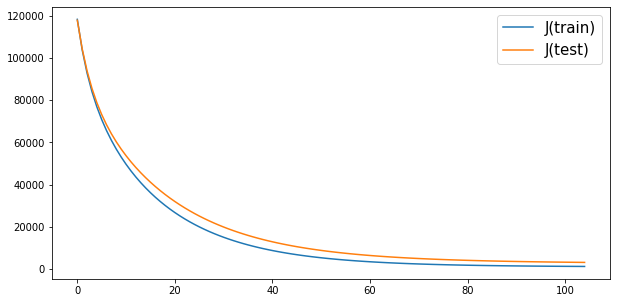

In [54]:
# Now it's time to run the gradient descent, let's parametrize it
alpha = 0.03
epsilon = 0.01
gradDescentEvol = pd.DataFrame()
count = 0
costFct = 0
plot = True

# and run it! (it's a quite long...)
while np.abs(costFunction(Y_train,yhat) - costFct) >= epsilon * costFct:
    count += 1
    costFct = costFunction(Y_train,yhat)
    theta += gradDescent(X_train,Y_train,yhat,alpha)
    yhat = hypothesis(X_train,theta)
    gradDescentEvol = gradDescentEvol.append(pd.DataFrame({'Jtrain':costFunction(Y_train,yhat),
                                                           'Jtest':costFunction(Y_test,hypothesis(X_test,theta))},
                                                          index = np.arange(1)),
                                             ignore_index=True)
    if plot:
        fig, ax = plt.subplots(figsize=(10,5))
        plotCostFunctionEvolwTest(ax,gradDescentEvol)
        clear_output(wait=True)
        display(plt.gcf())
        plt.close(fig)

In [55]:
# Afficher les résultats:
print('La descente de gradient a été réalisé en %i étapes.' % count)
print('train_err = %f' % errorFct(Y_train,hypothesis(X_train,theta)))
print('test_err = %f' % errorFct(Y_test,hypothesis(X_test,theta)))

La descente de gradient a été réalisé en 105 étapes.
train_err = 35.458288
test_err = 54.277269


In [56]:
theta.sort_values()

memory type_GDRR5          -26.658001
chipset_amd                -26.358177
memory type_GDDR5          -23.275740
builder_inno3D              -9.976303
memory type_DDR4            -7.940460
overclock                   -7.769914
builder_sapphire            -7.324863
bus_PCI Express 2.0 8x      -6.377151
bus_PCI Express 3.0 16x     -2.890145
memory type_GDDR3           -2.685889
builder_evga                -2.618313
builder_gigabyte            -1.875777
builder_msi                  0.559908
builder_zotac                0.900541
builder_amd                  3.623354
direct_X_11                  5.765239
bus_PCI Express 2.0 16x      6.053247
memory type_DDR3             6.622505
builder_asus                11.256229
video memory freq (MHz)     17.488080
memory type_HBM2            17.532441
memory type_GDDR5X          22.232394
boostFreqIncr               27.929836
frequency (MHz)             28.247085
interfaceMem (bits)         32.279458
multi GPU                   32.694674
consumption 

In [57]:
theta[[c for c in theta.keys() if 'builder' in c]].sort_values()

builder_inno3D      -9.976303
builder_sapphire    -7.324863
builder_evga        -2.618313
builder_gigabyte    -1.875777
builder_msi          0.559908
builder_zotac        0.900541
builder_amd          3.623354
builder_asus        11.256229
dtype: float64